# INTERSTELLAR WIKIPEDIA PAGE VIEWS OVER TIME

This notebook details the extraction of data using Wikimedia's Pageviews REST API to extract the page views of the "Interstellar (film)" Wikipedia page over a period of time.

## STEP 1: DATA EXTRACTION

To extract data, I used Wikimedia's Pageviews REST API. I made a method to pull data from Wikimedia's server and dump the data into the variable "views" over a predetermined period of time. I recorded two variables, the date and total view count of that page on that date.

In [13]:
import requests

def get_page_views(title, start_date, end_date):
 
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:91.0) Gecko/20100101 Firefox/91.0"
    }
    response = requests.get(f"https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{title}/daily/{start_date}/{end_date}", headers=headers)
    data = response.json()['items']
    views = {item['timestamp'][:8]: item['views'] for item in data}
    return views
    
views = get_page_views("Interstellar_(film)", "20150701", "20161026")
print(views)

{'20150701': 15849, '20150702': 16046, '20150703': 17525, '20150704': 21141, '20150705': 22729, '20150706': 21428, '20150707': 17538, '20150708': 16484, '20150709': 16002, '20150710': 15755, '20150711': 19557, '20150712': 23086, '20150713': 19258, '20150714': 17276, '20150715': 16005, '20150716': 15384, '20150717': 16119, '20150718': 19997, '20150719': 23495, '20150720': 18941, '20150721': 16236, '20150722': 15606, '20150723': 16142, '20150724': 18241, '20150725': 26709, '20150726': 26658, '20150727': 20200, '20150728': 16252, '20150729': 14889, '20150730': 14477, '20150731': 15198, '20150801': 18148, '20150802': 20563, '20150803': 16179, '20150804': 14855, '20150805': 14032, '20150806': 13786, '20150807': 13728, '20150808': 18079, '20150809': 20452, '20150810': 16355, '20150811': 14362, '20150812': 13896, '20150813': 13621, '20150814': 13105, '20150815': 16548, '20150816': 19614, '20150817': 16244, '20150818': 14264, '20150819': 14239, '20150820': 14682, '20150821': 32015, '20150822':

## STEP 2: DATA TRANSFORMATION AND LOAD

After I extracted the data, I transformed the data into a list of dictionaries, with dates being the keys and the views being the values. I then dumped the data from the "views" variable into a raw JSON file, created a dataframe to access later using the pandas API, and saved the data into a CSV file using the JSON and CSV APIs. To more easily plot the dates, I found a pandas method to convert raw dates into a pandas datetime format. This makes it much easier to plot time series data. I also added two new attributes, day_of_week and month to easily view the data.

In [14]:
import csv
import json 
import pandas as pd

data_list = [{"date": date, "views": views} for date, views in views.items()]


df = pd.DataFrame(data_list)
df["date"] = pd.to_datetime(df["date"])
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()


json.dump(views, open('raw_data.json', 'w'))


df.to_csv('interstellar_views.csv', encoding='utf-8', index=False)

## STEP 3: DATA VISUALIZATIONS

Using the pandas API, I described the count, mean, and other basic statistical values of the views variable and printed it. 

In [15]:
df.describe()["views"]

count      484.000000
mean     14327.838843
min       6444.000000
25%       9031.750000
50%      12053.000000
75%      17278.250000
max      50379.000000
std       7140.131574
Name: views, dtype: float64

When picking what plot to use for this data, I considered the amount of data and what insights I wanted to draw from the plot. There are over 450 data points in this dataset, and a scatter plot would be perfect to map this sheer amount of data over time. 

I used matplotlib and pandas to plot the data of Interstellar views vs. Time.

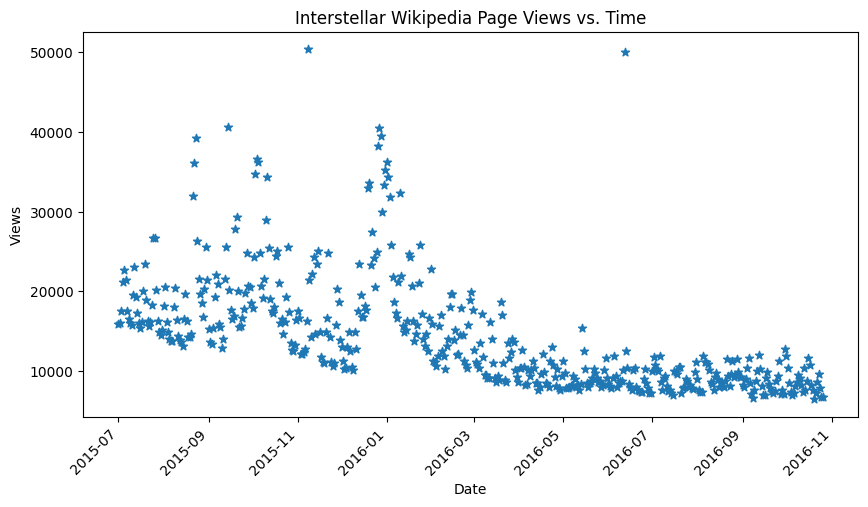

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

dates_column = df["date"]
views_column = df["views"]

plt.figure(figsize=(10, 5))  
plt.scatter(dates_column, views_column, marker="*")

plt.xlabel("Date")
plt.ylabel("Views")
plt.title("Interstellar Wikipedia Page Views vs. Time")
plt.xticks(rotation=45, ha="right")

plt.show()

I noticed that the data trends downwards as time goes on. The data also has a peak of over 50,000 views in one day, which is over 36,000 more than the mean. 